In [5]:
import tensorflow as tf 
import matplotlib.pyplot as plt

In [3]:
# hand writen digits from 0 - 9 dataset
minst = tf.keras.datasets.mnist

In [4]:
(X_train, y_train), (X_test, y_test) = minst.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [36]:
X_train.shape

(60000, 28, 28)

In [28]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        

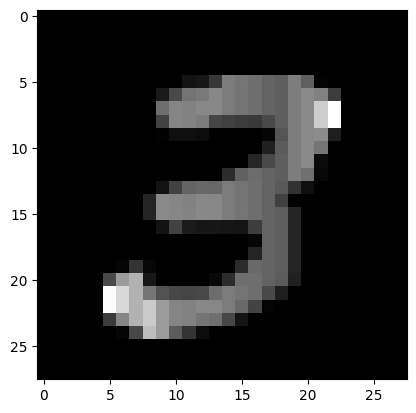

In [35]:
import numpy as np
index = 7
image = X_train[index]
np.set_printoptions(linewidth=400)
print(image)
plt.imshow(image, cmap='gray')

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [70]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [71]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['loss'] <= 0.04 and logs['val_accuracy'] >= 0.99:
            print('Reached less than 0.04 loss and greater than 0.99 val accuracy')
            self.model.stop_training = True

In [76]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=5, callbacks=[mycallback()])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9872 - loss: 0.0398 - val_accuracy: 0.9832 - val_loss: 0.0671
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9878 - loss: 0.0387 - val_accuracy: 0.9831 - val_loss: 0.0682
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9889 - loss: 0.0341 - val_accuracy: 0.9832 - val_loss: 0.0649
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9877 - loss: 0.0363 - val_accuracy: 0.9834 - val_loss: 0.0655
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9885 - loss: 0.0348 - val_accuracy: 0.9820 - val_loss: 0.0655


In [78]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(val_accuracy, val_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9795 - loss: 0.0746
0.9819999933242798 0.06550677120685577


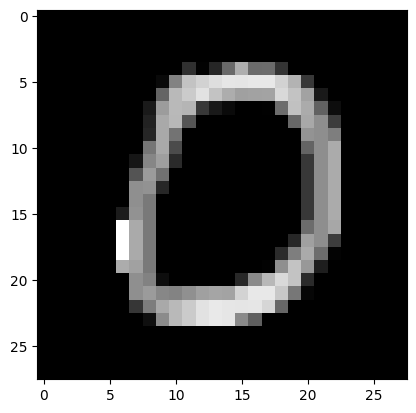

In [86]:
plt.imshow(X_test[10], cmap='gray')

In [87]:
prediction = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [88]:
print(np.argmax(prediction[10]))

0
